# LVDT Voice Coil Simulation Plots
### Analyse the voice coil measurement of a reversed LVDT with geometry as used in ETpathfinder large IP. 

#### Import everything

In [1]:
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Read in data
[0] = positions, 
[1] = upper outer coil forces,
[2] = lower outer coil forces, 
[3] = magnet forces
[4] = meta data: NSteps, StepSize, OutCoil_Current

In [2]:
files = ['RevLVDT_VC_ETpf_LIP_DC_1A_32AWG.out',
         'NPResults_RevLVDT_FEMM_DC_Move_MiddCoil+Magnet_ETpfLVDT.txt']

legends = ['pyFEMM',
           'standalone FEMM']

inputdata = []
NSteps = []
StepSize = []
OutCoil_Current = []

for i in range(0,len(files)):
    inputarray = np.loadtxt(files[i])
    inputdata.append(inputarray)
    NSteps.append(int(inputarray[4][0]))
    StepSize.append(inputarray[4][1])
    OutCoil_Current.append(inputarray[4][2]) 

print(inputdata)
print(NSteps)
print(StepSize)
print(OutCoil_Current)

[array([[-5.        , -4.        , -3.        , -2.        , -1.        ,
         0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ],
       [-0.25594652, -0.26183395, -0.26707374, -0.27166243, -0.27552955,
        -0.27855643, -0.28071311, -0.28186792, -0.28205174, -0.28111208,
        -0.27912456],
       [-0.33612301, -0.33822081, -0.3390867 , -0.33887341, -0.33773451,
        -0.33561315, -0.33255421, -0.32864777, -0.32409245, -0.31873622,
        -0.31293127],
       [ 0.59235138,  0.59914519,  0.60851727,  0.61236887,  0.61457383,
         0.61430121,  0.61456631,  0.61000795,  0.60657501,  0.5996988 ,
         0.59184398],
       [10.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]]), array([[-5.        , -4.        , -3.        , -2.        , -1.        ,
         0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.

#### Analyse and plot output data
Basic plots:

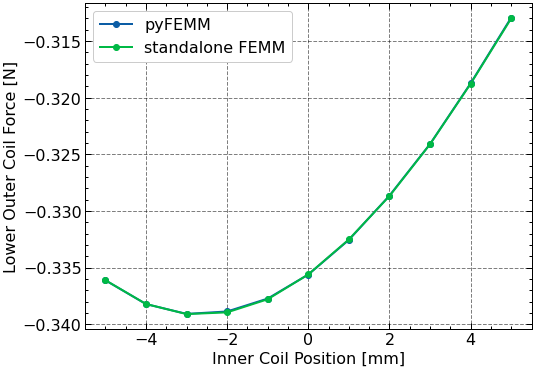

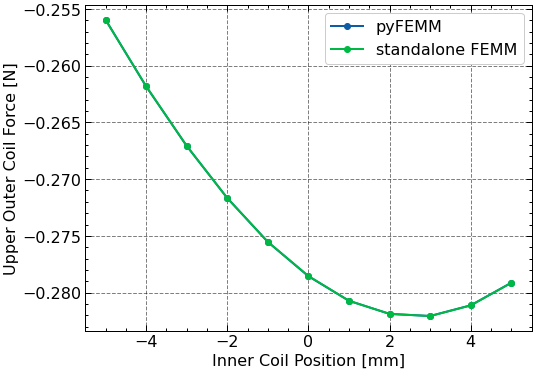

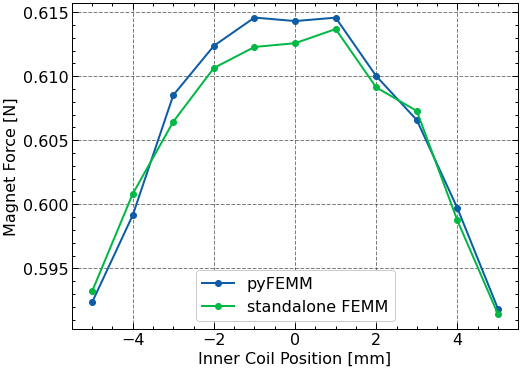

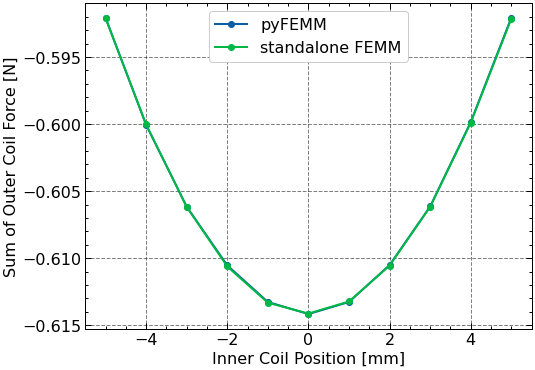

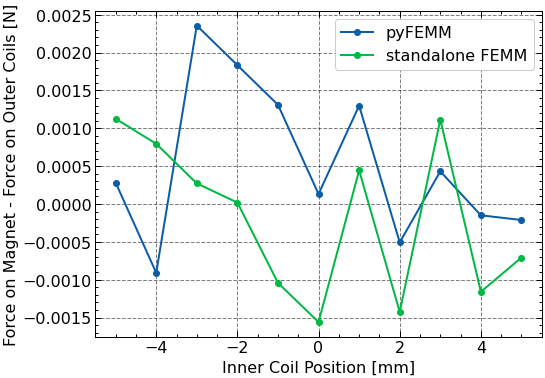

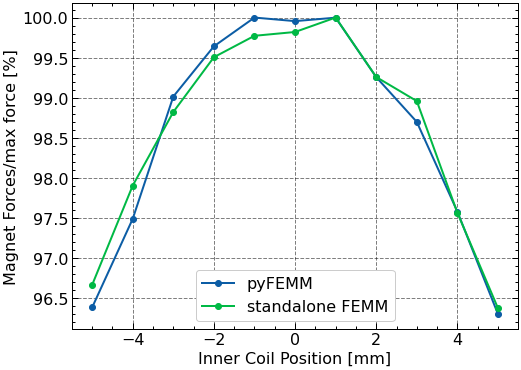

In [3]:
#print(plt.style.available)
plt.style.use(['science','grid','notebook'])

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2], 'o-', label=legends[i])
plt.ylabel('Lower Outer Coil Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][1], 'o-', label=legends[i])
plt.ylabel('Upper Outer Coil Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3], 'o-', label=legends[i])
plt.ylabel('Magnet Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2] + inputdata[i][1], 'o-', label=legends[i])
plt.ylabel('Sum of Outer Coil Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3] - abs(inputdata[i][2] + inputdata[i][1]), 'o-', label=legends[i])
plt.ylabel('Force on Magnet - Force on Outer Coils [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3]/max(inputdata[i][3])*100, 'o-', label=legends[i])
plt.ylabel('Magnet Forces/max force [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

Create normalised response of magnet forces in N/A and fit with second order polynominal.

Fitted parameters of function: [-9.30806807e-04 -9.88972321e-05  6.15121686e-01]
Fitted parameters of function: [-8.44633464e-04 -1.48670275e-04  6.13556473e-01]


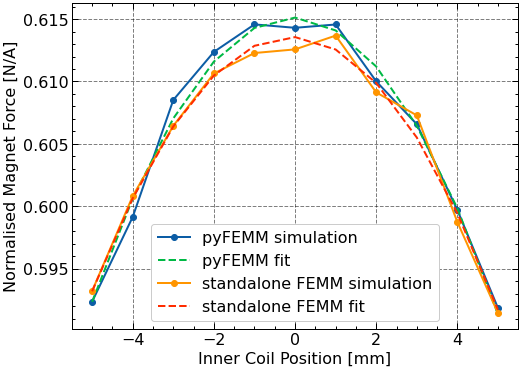

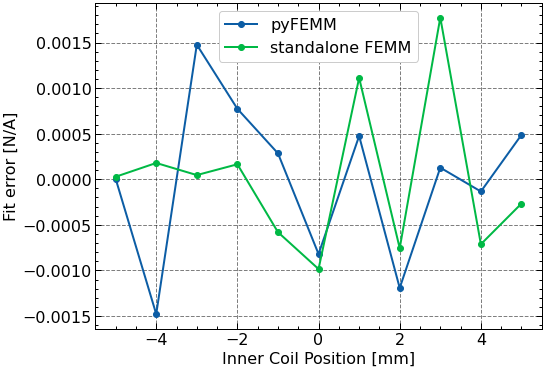

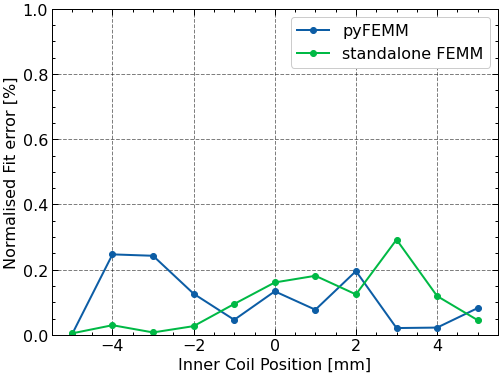

In [4]:
def polyfunc(x, a, b, c):
     return a*x**2 + b*x + c

Norm_Magnet_Forces = []
fitted_Norm_Magnet_Forces = []
for i in range(0,len(files)):
    Norm_Magnet_Forces.append(inputdata[i][3]/OutCoil_Current[i]) 
    optimizedParameters, pcov = opt.curve_fit(polyfunc, inputdata[i][0], inputdata[i][3]/OutCoil_Current[i])
    print("Fitted parameters of function:", optimizedParameters)
    fitted_Norm_Magnet_Forces.append(polyfunc(inputdata[i][0], *optimizedParameters))
    
for i in range(0,len(files)):    
    plt.plot(inputdata[i][0], Norm_Magnet_Forces[i], 'o-', label=legends[i] + " simulation")
    plt.plot(inputdata[i][0], fitted_Norm_Magnet_Forces[i], '--', label=legends[i] + " fit")
plt.ylabel('Normalised Magnet Force [N/A]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], Norm_Magnet_Forces[i] - fitted_Norm_Magnet_Forces[i], 'o-', label=legends[i])
plt.ylabel('Fit error [N/A]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(Norm_Magnet_Forces[i] - fitted_Norm_Magnet_Forces[i])/abs(Norm_Magnet_Forces[i])*100, 'o-', label=legends[i])
plt.ylabel('Normalised Fit error [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.ylim(0.0,1.0)
plt.legend()
plt.show()